In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
data=pd.read_csv('zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data['animal name'].value_counts()

frog        2
giraffe     1
ostrich     1
scorpion    1
haddock     1
           ..
carp        1
chub        1
cavy        1
catfish     1
slowworm    1
Name: animal name, Length: 100, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['animal name'] = le.fit_transform(data['animal name'])

In [5]:
# split data :
x = data.iloc[:,1:17]
# x.head()
y = data.iloc[:,17]
x.shape,y.shape

((101, 16), (101,))

In [6]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
#knn algo.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred= knn.predict(x_test)

In [8]:
np.mean(pred==y_test)

1.0

In [9]:
#prediction and evaluation
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)

array([[11,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  2]], dtype=int64)

In [10]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [11]:
error_rate=[]
for i in range(1,40):
    knn_model= KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred_i=knn_model.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test).round(2))
print(error_rate)

[0.0, 0.19, 0.24, 0.29, 0.33, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.43, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52]


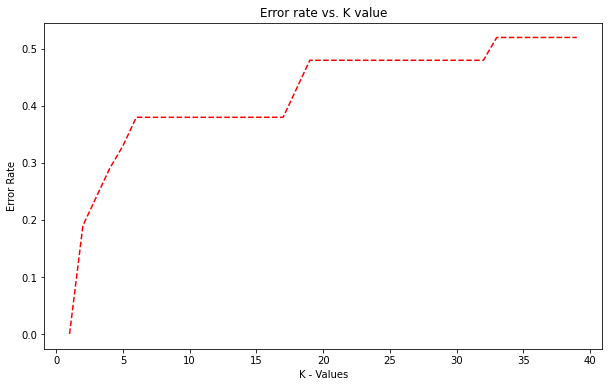

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',markerfacecolor='red',markersize=10)
plt.xlabel('K - Values')
plt.ylabel('Error Rate')
plt.title('Error rate vs. K value')
plt.show()

In [13]:
# use k=1:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred= knn.predict(x_test)
print('accuracy =',np.mean(pred==y_test))

print(confusion_matrix(y_test,pred))

print(classification_report(pred,y_test))

accuracy = 1.0
[[11  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [14]:
# Grid-Search without applying cross-validation :
from sklearn.model_selection import GridSearchCV

param_grid=dict(n_neighbors=range(1,40))
knn_models=KNeighborsClassifier()
grid= GridSearchCV(estimator=knn_models,param_grid=param_grid)
grid.fit(x,y)
print(grid.best_score_)
grid.best_params_

0.97


{'n_neighbors': 1}

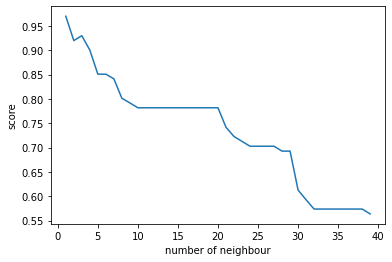

0.97


In [15]:
# kfold cross-validation :
from sklearn.model_selection import cross_val_score
k_score=[]
for i in range(1,40):
    knn_models = KNeighborsClassifier(n_neighbors=i)
    scores= cross_val_score(knn_models,x,y)
    k_score.append(scores.mean())

plt.plot(range(1,40),k_score)
plt.xlabel("number of neighbour")
plt.ylabel("score")
plt.show()
print(max(k_score))

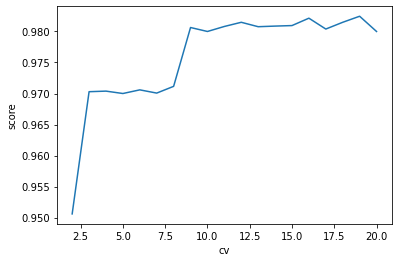

0.9824561403508772


In [16]:

# find best cv value :
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(2,21)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = 1)
    scores = cross_val_score(knn, x, y, cv=k)
    k_score.append(scores.mean())
plt.plot(k_range, k_score)
plt.xlabel("cv")
plt.ylabel("score")
plt.show()
print(max(k_score))



In [17]:
model_1 = KNeighborsClassifier(n_neighbors=1)
result = cross_val_score(model_1, x, y, cv=19)
print("accuracy at k = 1 and cv = 19 is =",result.mean())

accuracy at k = 1 and cv = 19 is = 0.9824561403508772


In [18]:
model_2 = KNeighborsClassifier(n_neighbors=3)
result = cross_val_score(model_2, x, y, cv=19)
print("accuracy at k = 3 and cv = 19 is =",result.mean())

accuracy at k = 3 and cv = 19 is = 0.9561403508771931


In [19]:
# creating model using train_test_split model validation technique :
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)
model = KNeighborsClassifier(1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [20]:
print(np.mean(y_pred == y_test))
pd.crosstab(y_pred, y_test)

0.967741935483871


type,1,2,4,5,6,7
row_0,,,,,,
1,12,0,0,0,0,0
2,0,5,0,0,0,0
3,0,0,0,1,0,0
4,0,0,4,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,5,0
7,0,0,0,0,0,3


In [21]:
# gridsearch for train_test_split ;
clf = GridSearchCV(estimator=model, param_grid = param_grid)
clf.fit(x_train, y_train)
print(grid.best_score_)         # 97 % training accuracy
grid.best_params_

0.97


{'n_neighbors': 1}

In [22]:
pred = clf.predict(x_test)
pd.crosstab(y_test, pred)
np.mean(y_test == pred)  

0.967741935483871

In [23]:
# model validation : leave-one-out :
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
models = [model, model_1, model_2]
std_score = []
accuracy = []
for i in models :
    res = cross_val_score(i, x, y, cv=loocv)
    std_score.append(res.std()*100)
    accuracy.append(res.mean()*100)
print(std_score)
print(accuracy)

[13.931927999475535, 13.931927999475535, 21.691982475452125]
[98.01980198019803, 98.01980198019803, 95.04950495049505]


In [24]:
# from above calculation we can conclude that model_2 has high standard deviaation which leads to model failure 
# model {k = 1} using train_test_split validation technique and model_1{k=1 and cv=19}gives us high accuracy 
# where as , model_2 {k=3 and cv = 19 }is good model.
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)
np.mean(y_pred_1 == y_test)          # 96.77 % testing accuracy

0.967741935483871

In [25]:
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
np.mean(y_pred_2 == y_test)          # 93.54 % testing accuracy

0.9354838709677419